### Data Load

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
min_doc_freq = 2

In [5]:
train = pd.read_pickle('./train.pkl')

In [6]:
test = pd.read_pickle('./test.pkl')

In [7]:
vectorizer  = TfidfVectorizer(min_df=min_doc_freq)

In [8]:
x_train = vectorizer.fit_transform(train.Content)

In [9]:
x_test = vectorizer.transform(test.Content)

In [10]:
label_encoder = LabelEncoder()

In [11]:
train_int_lbl = label_encoder.fit_transform(train.Lable.values)

In [12]:
test_int_lbl = label_encoder.transform(test.Lable.values)

In [13]:
n_samples = np.bincount(train_int_lbl).sum()

In [14]:
n_classes = np.bincount(train_int_lbl).shape[0]

In [15]:
one_hot =  OneHotEncoder(sparse=False)

In [16]:
y_train = train_int_lbl #one_hot.fit_transform(train_int_lbl.reshape(-1, 1))

In [35]:
y_test = one_hot.fit_transform(test_int_lbl.reshape(-1, 1))

### SGD Classifier

I use sklearn style wrapper for feed forward neural network. This wrapper allows to modify hyper-parameters quickly. It uses keras + tensorflow

In [70]:
from sklearn.linear_model import SGDClassifier

SGD classifier with log loss and l2 penalty is equivalent to Logistic regression, however is more scalable and also provides more options 'elasticnet' which I tried. 

In [71]:
model = SGDClassifier(loss='log', penalty='l2', max_iter=10000, tol=1e-5, class_weight='balanced')

In [72]:
model

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=10000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=1e-05, verbose=0, warm_start=False)

In [73]:
model.fit(X=x_train, y=y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=10000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=1e-05, verbose=0, warm_start=False)

### Testing 

Test the model once finalized

In [74]:
from utils import evaluate, plot_me_nice

In [75]:
accuracy, conf_mat, roc = evaluate(y_true=y_test, y_score=model.predict_proba(x_test))

In [76]:
accuracy

0.8212881022615536

In [77]:
roc

0.96959167479849

In [78]:
print(conf_mat)

[[  36    0    0    3    0    0    3    0    0    0    0    1    0    1]
 [   4 3214  106   67  152    0   35    4   35   10    1  111    4    6]
 [   0    8   29    6    0    0    0    0    0    0    0    3    0    0]
 [  13   32   23 1532   16    2   39    0    1    4    1  137    2   18]
 [   5  126    0    8 1523    0   10   95    6   43   13   40   31    4]
 [   1    2    2    3    1  150    0    0    2    0    0   15    0    0]
 [   1   23    3   57   12    1   69    4    2    2    0   22    2    1]
 [   0    2    0    3   86    3    2  816    0   18    0    7    4    0]
 [   0   20    0    1    0    0    4    1  104    0    0    3    4    1]
 [   0    7    0    1    6    0    0    1    1   36    0    0    0    0]
 [   0    0    0    0    2    0    0    2    3    0  116    2    0    0]
 [  14  116   31  123   51   77   32   11   15    6    7 1522   18   13]
 [   0    9    0    2   16    0    4    3    5   29    1   17  749    0]
 [   0    3    0    1    1    0    1    0    0    0

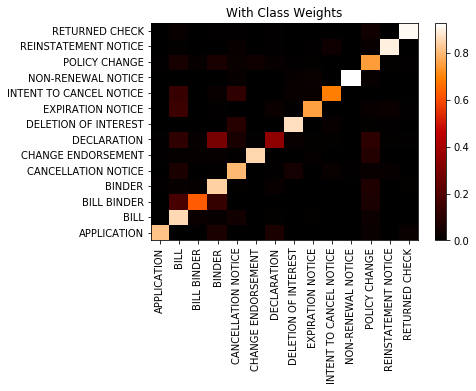

In [79]:
plot_me_nice(confusion_matrix=conf_mat, labels=list(label_encoder.classes_), title='With Class Weights')